In [1]:
import pandas as pd

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

# Q1. Downloading the data

In [3]:
# Read the data for January. How many records are there?
df = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')
print(len(df))

1154112


# Q2. Computing duration

In [4]:
# What's the average trip duration in January?
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
print(df.duration.mean())

19.1672240937939


**Data preparation**

/home/sk/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


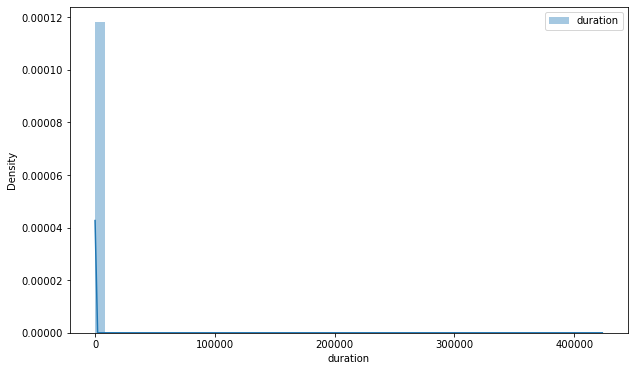

In [5]:
# Check the distribution of the duration variable.
f = plt.figure(figsize=(10,6))
sns.distplot(df['duration'], label='duration')
plt.legend()
plt.show()

In [6]:
# Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
# How many records did you drop?
print(1154112-len(df))

44286


/home/sk/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


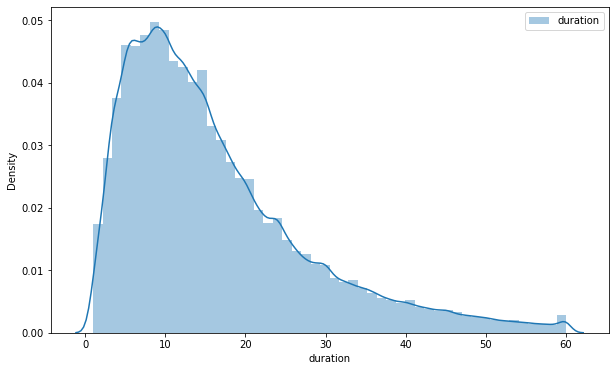

In [7]:
# Check the distribution of the duration variable.
f = plt.figure(figsize=(10,6))
sns.distplot(df['duration'], label='duration')
plt.legend()
plt.show()

In [8]:
df.head(3)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333


# Q3. Missing values

In [9]:
df['PUlocationID'].fillna(-1, inplace=True)
df['DOlocationID'].fillna(-1, inplace=True)
df.head(3)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333


In [15]:
# What's the fractions of missing values for the pickup location ID? 
print('{:.2%}'.format(df['PUlocationID'].value_counts()[-1]/len(df['PUlocationID'])))

83.53%


In [16]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.dropOff_datetime = pd.to_datetime(df.dropOff_datetime)
        df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    df['PUlocationID'].fillna(-1, inplace=True)
    df['DOlocationID'].fillna(-1, inplace=True)

    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [17]:
df_train = read_dataframe('../data/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('../data/fhv_tripdata_2021-02.parquet')

In [18]:
df_train.head(3)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333


# Q4. One-hot encoding

In [21]:
categorical = ['PUlocationID', 'DOlocationID']
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [22]:
# What's the dimensionality of this matrix?
X_train.shape

(1109826, 2)

# Q5. Training a model

In [25]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

11.415432830521663

/home/sk/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sk/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


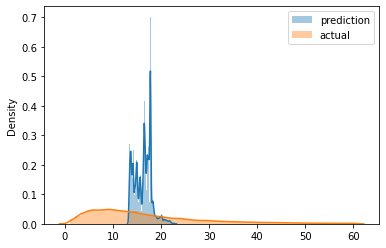

In [26]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
plt.show()

# Q6. Evaluating the model

In [27]:
len(df_train), len(df_val)

(1109826, 990113)

In [28]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
y_val = df_val[target].values

In [30]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.992306570398757